[View in Colaboratory](https://colab.research.google.com/github/Jpeiii/DeepLearning.ai/blob/master/Deep_Learning_5.ipynb)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:132: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:132: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


Cost after iteration 0: inf
Cost after iteration 1000: 16.2974660523
Cost after iteration 2000: 21.4337523592
Cost after iteration 3000: 0.505294114325
Cost after iteration 4000: 0.491450880118
Cost after iteration 5000: 0.523825163877
Cost after iteration 6000: 0.491493396215
Cost after iteration 7000: 0.468516561799
Cost after iteration 8000: 0.46974177396
Cost after iteration 9000: 0.467297967656
Cost after iteration 10000: 0.497241653284
Cost after iteration 11000: 0.518495428953
Cost after iteration 12000: 0.548865830113
Cost after iteration 13000: 0.517966306911
Cost after iteration 14000: 0.50977919014


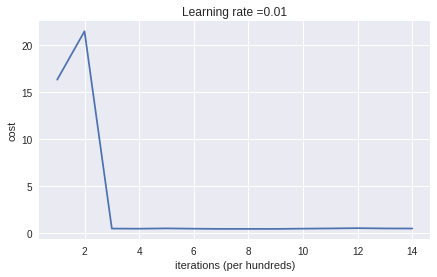

On the train set:
Accuracy: 0.7366666666666667
On the test set:
Accuracy: 0.74


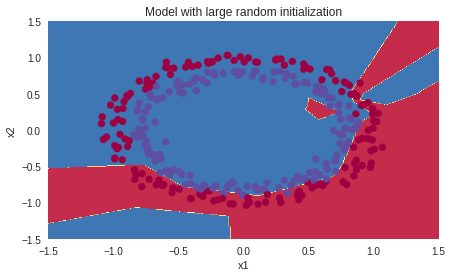

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets

def load_dataset():
  
  train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=0.05)
  test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=0.05)
  #plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral)
  train_X = train_X.T
  train_Y = train_Y.reshape((1, train_Y.shape[0]))
  test_X = test_X.T
  test_Y = test_Y.reshape((1, test_Y.shape[0]))
  return train_X, train_Y, test_X, test_Y
 
train_X, train_Y, test_X, test_Y = load_dataset()


def sigmoid(x):
  
  s = 1/(1+np.exp(-x))
  
  return s

def relu(x):
  
  s = np.maximum(0,x)
  
  return s

def initialize_parameters_random(layers_dims):
  
    
    np.random.seed(3)               
    parameters = {}
    L = len(layers_dims)            
    
    for l in range(1, L):
     
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
      

    return parameters

def forward_propagation(X, parameters):
    
 
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
   
    cache = {'Z1':Z1,
             'A1':A1,
             'Z2':Z2,
             'A2':A2,
             'Z3':Z3,
             'A3':A3}


    return A3, cache


def backward_propagation(X, Y, cache):
   
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    A3 = cache['A3']
    A2 = cache['A2']
    A1 = cache['A1']
    
    dz3 = 1./m * (A3 - Y)
    dW3 = np.dot(dz3, A2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)

    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(A2 > 0))
    dW2 = np.dot(dz2, A1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)

    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(A1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {'dz3': dz3,
                 'dW3': dW3,
                 'db3': db3,
                 'da2': da2,
                 'dz2': dz2,
                 'dW2': dW2,
                 'db2': db2,
                 'da1': da1,
                 'dz1': dz1,
                 'dW1': dW1,
                 'db1': db1}


    return gradients


  
def update_parameters(parameters, gradients, learning_rate):
   

    L = len(parameters) // 2 

   
    for k in range(L):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * gradients["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * gradients["db" + str(k+1)]

    return parameters
  
def compute_loss(A3, Y):

    m = Y.shape[1]
    logprobs = np.multiply(-np.log(A3),Y) + np.multiply(-np.log(1 - A3), (1 - Y))
    loss = 1./m * np.nansum(logprobs)

    return loss
  
  
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True):
    

    grads = {}
    costs = [] 
    m = X.shape[1] 
    layers_dims = [X.shape[0], 10, 5, 1]
    parameters = initialize_parameters_random(layers_dims)
   


    for i in range(0, num_iterations):

        A3, cache = forward_propagation(X, parameters)
        cost = compute_loss(A3, Y)
        gradients = backward_propagation(X, Y, cache)
        parameters = update_parameters(parameters, gradients, learning_rate)
        if print_cost and i % 1000 == 0:
          print("Cost after iteration {}: {}".format(i, cost))
          costs.append(cost)

   
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters
  
def plot_decision_boundary(model, X, y):
  
    
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
   
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
   
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=np.squeeze(y), cmap=plt.cm.Spectral)
    plt.show()

        
def predict_dec(parameters, X):
    
    A3, cache = forward_propagation(X, parameters)
    predictions = (A3>0.5)
    return predictions

    
    
parameters= model(train_X, train_Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True)

def predict(X, y, parameters):
  
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)

    
    A3, caches = forward_propagation(X, parameters)

   
    for i in range(0, A3.shape[1]):
        if A3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

  
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))

    return p

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)



plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

  

